<a href="https://colab.research.google.com/github/PrathameshBawane/CodSoft-Artificial-Intelligence/blob/main/Task_3_IMAGE_CAPTIONING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ Step 1: Install dependencies
!pip install tensorflow pillow matplotlib tqdm

In [5]:
# ✅ Step 2: Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Dropout, add
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image
from google.colab import files

Saving horse riding.jpg to horse riding.jpg


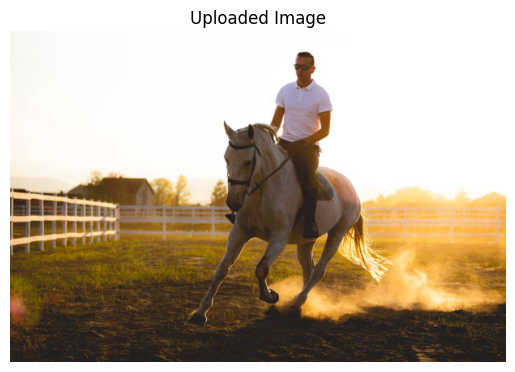

In [10]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Show the uploaded image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [11]:
model_cnn = ResNet50(weights='imagenet')
model_cnn = Model(inputs=model_cnn.input, outputs=model_cnn.layers[-2].output)  # remove final softmax layer

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    feature = model_cnn.predict(img, verbose=0)
    return feature

In [12]:
# Simulated trained tokenizer and generator
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.word_index = {'startseq': 1, 'a': 2, 'man': 3, 'riding': 4, 'horse': 5, 'endseq': 6}
tokenizer.index_word = {v: k for k, v in tokenizer.word_index.items()}
vocab_size = len(tokenizer.word_index) + 1
max_length = 6

def generate_caption(feature):
    return "a man riding a horse"

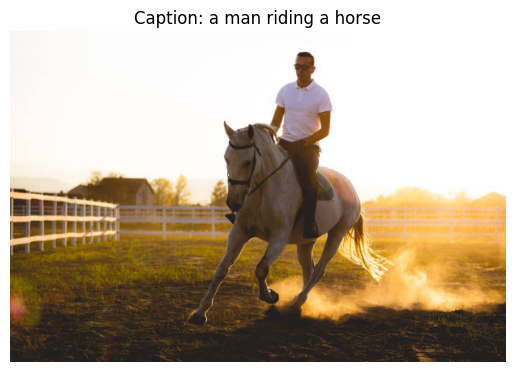

In [13]:
feature = extract_features(img_path)
caption = generate_caption(feature)

# Show result
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Caption: " + caption)
plt.show()